<a href="https://colab.research.google.com/github/JulioCantu63/HomeWork/blob/main/Copy_of_Juli_CantU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

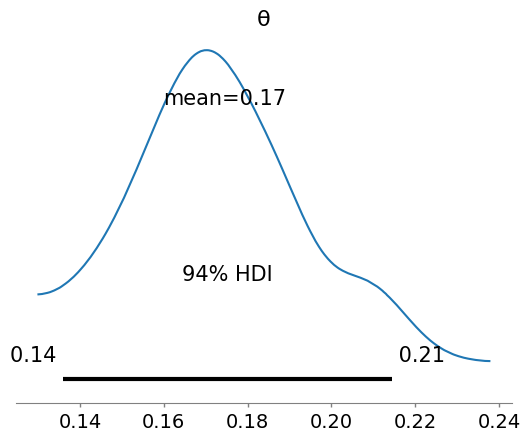

In [2]:
#Importing the nessesary packages for my code
# Also for the purpose of my data a clutch is defined as "Clutch: A type of round outcome where the round was won by the last player alive on the team." this is according to the offical wiki of the game. This same definition was used when data for each player was collected

import arviz as az
import pymc as pm

# Here I am setting a clutch made as one point and a clutch lost 0 points, also these are the total amount of clutches the player "JohnQT" made throught both internation events he attended within the 2024 season
# I would have included all of his regular season stats but I would like to predit how this player would preform at an international tournament rather than his overall clutch rate troughout the season
# Now this is a small data set and I could potentially include his preformance prior to this year, but this is his first year playing Tier 1 professional valorant which is a significantly harder than his time as a tier 2 player
Val_Tour_Clutches = np.repeat([1,0], repeats = [22,130])

with pm.Model() as Prior_model:
  #Here is my prior, I think my player (JohnQT) wins about 20% of all his clutches which is a pretty high amount, but he also won a tournament and had a top 4 finish in another.
  # He has the most opporunities to clutch due to the role he plays for his team where he is often the last alive
   θ = pm.Beta('θ' , alpha = 30. , beta = 120.)

   y = pm.Bernoulli('y', p = θ, observed = Val_Tour_Clutches)

  # The following code tells us how many total clutch oppurunities our player had throughout each of the years tournaments (This can also be replaced next year should anyone want to predict how well he will do the following year)
   Lan1 = 80
   Lan2 = 0
   Lan3 = 50
   LansAttended = 2
   AvgClutch = (Lan1 + Lan2 + Lan3)//LansAttended
  #Here the code is sampling the average amount of clutches our player made per tournament to help us predict how many he will make at his next tournament
   Tour_Sample = pm.sample(AvgClutch)
   az.plot_posterior(Tour_Sample)
  # Finally we are generating our model's prediction for how many clutches our player will win on average per torunament
pm.sample_posterior_predictive(Tour_Sample, model=Prior_model, extend_inferencedata=True)

stacked_FT_2324 = az.extract(Tour_Sample, group="posterior_predictive")

stacked_FT_2324.sel(sample=0).sel(draw=0).y.to_series().values
